#CMPT353 summer 2020
#SFU
#Course Porject
#Author: Wei Yao (yaoweiy@sfu.ca) Yiran Zhang(yiran_zhang_2@sfu.ca)
#Dataset 1: Covid-19
#Resource Ref: https://www.kaggle.com/kimjihoo/coronavirusdataset

#Dataset 2: COVID19 Global Forecasting
#https://www.kaggle.com/c/covid19-global-forecasting-week-5

In [1]:

import numpy as np
import pandas as pd


In [2]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier



# 2) Insights from Policy

# 2.1 Distribution of policy types

In [3]:
policy_df = pd.read_csv('Policy.csv')
df_type=policy_df['type'].tolist()
len(df_type)

61

In [4]:
policy_df['type'].value_counts(dropna=True)

Education         15
Immigration       15
Health            10
Technology         6
Social             5
Alert              4
Transformation     3
Administrative     3
Name: type, dtype: int64

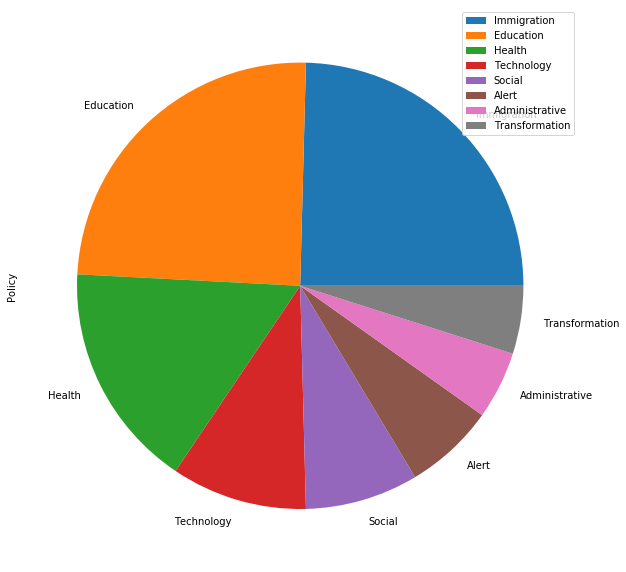

In [5]:
type_df = pd.DataFrame({'Policy': [15/61, 15/61 , 10/61,6/61,5/61,4/61,3/61,3/61]  } ,                 
                  index=['Immigration', 'Education', 'Health','Technology','Social','Alert','Administrative','Transformation'])
plot=type_df.plot.pie(y='Policy',figsize=(10,18))

# 2.2 Detailed Policy application Date

In [6]:
# pre-process
policy_df.head()


,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [7]:
df_gov_policy=policy_df['gov_policy'].tolist()
policy_df['gov_policy'].value_counts(dropna=True)
# sort data by date

policy_sort = policy_df.sort_values('start_date')

In [8]:
#replace long terms by short-cut
policy_sort['gov_policy']=policy_sort['gov_policy'].map({'Special Immigration Procedure': 'SIP',
                             'School Opening with Online Class':'SOOC',
                             'Emergency Use Authorization of Diagnostic Kit':'WUA',
                             'School Opening Delay':'SOD',
                             'Social Distancing Campaign':'SDC',
                             'Infectious Disease Alert Level':'IDAL',
                             'Mask Distribution':'MD',
                             'Wearing of masks':'WM',
                             'Drive-Through Screening Center':'D-T',
                             'Electronic Wristbands':'EW',
                             'Self-Quarantine Safety Protection App':'S-Q',
                             'Self-Diagnosis App':'S-D',
                             'Open Data ':'OD',
                             'Extends Tightened Quarantine Measures ':'ET',
                             'Close bars and clubs':'CB',
                             'School Closure':'SC',
                             'Mandatory 14-day Self-Quarantine':'M14',
                             'Open API':'OA',
                             'Close karaoke':'CK',
                             'Logistics center':'LC',
                             'local government Administrative orders':'LG',
                             'KI-Pass: Korea Internet - Pass':'KI',
                             'Thanks to Challenge korea':'TC',
                             'Mandatory Self-Quarantine & Diagonostic Tests':'MS'
                             
      
              })

In [9]:
pd.set_option('display.max_rows', None)
policy_sort['gov_policy']
#plt.plot(policy_df['gov_policy'],policy_df['start_date'])

0     IDAL
48      OD
1     IDAL
2     IDAL
4      SIP
19     WUA
5      SIP
6      SIP
50     S-D
20     WUA
3     IDAL
24     D-T
21     WUA
22     WUA
26      MD
28     SDC
37     SOD
36     SOD
35     SOD
34     SOD
33      SC
25     D-T
51     S-Q
49      OA
7      SIP
27      MD
9      SIP
8      SIP
23     WUA
12     SIP
10     SIP
11     SIP
13     SIP
14     SIP
15     SIP
16     SIP
29     SDC
17     M14
41    SOOC
38    SOOC
18      MS
32      TC
39    SOOC
40    SOOC
42    SOOC
43    SOOC
44    SOOC
45    SOOC
30     SDC
46    SOOC
47    SOOC
52      EW
31     SDC
53      CB
54      LG
55      CK
58      WM
57      WM
60      ET
56      LC
59      KI
Name: gov_policy, dtype: object

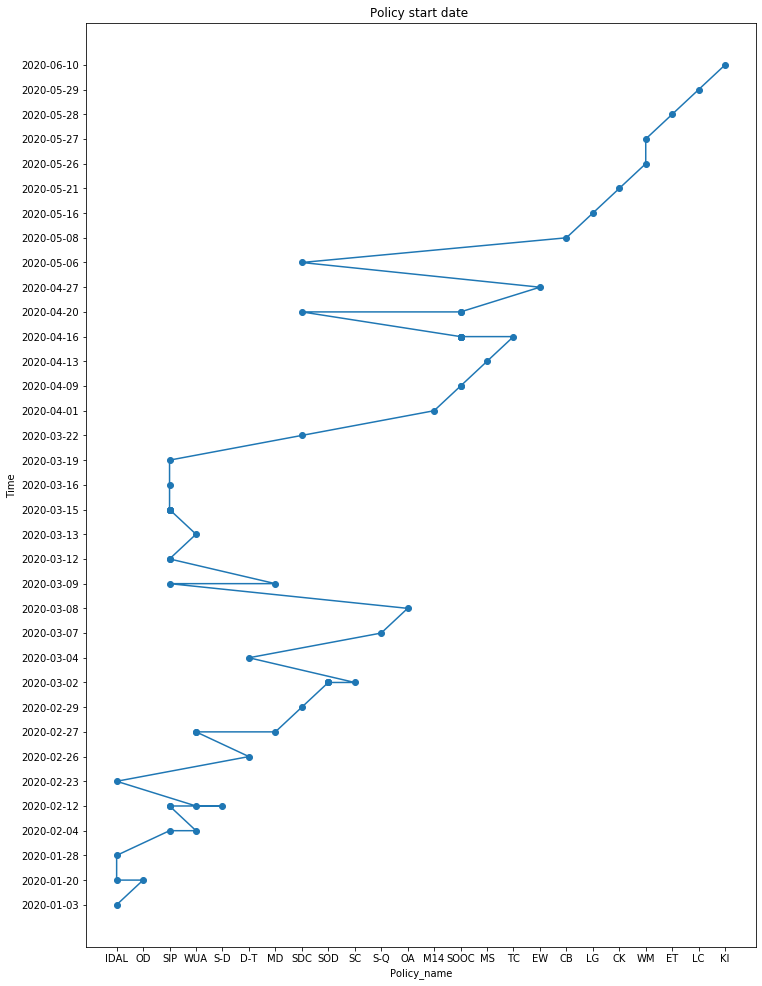

In [10]:
plt.figure(figsize=(12, 17))
plt.title('Policy start date ')
plt.xlabel('Policy_name')
plt.ylabel('Time')
plt.scatter(policy_sort['gov_policy'],policy_sort['start_date'])
plt.plot(policy_sort['gov_policy'],policy_sort['start_date'])

# 3) Seoul Floating

In [11]:
df = pd.read_csv('SeoulFloating.csv')
df.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [12]:
df.dropna()
df['date']=pd.to_datetime(df['date'],format = '%Y-%m-%d')
df_male = df[df['sex']=='male']
df_male.head()

,date,hour,birth_year,sex,province,city,fp_num
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
5,2020-01-01,0,20,male,Seoul,Dongjag-gu,30350
7,2020-01-01,0,20,male,Seoul,Eunpyeong-gu,27910
9,2020-01-01,0,20,male,Seoul,Gangbuk-gu,21940


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


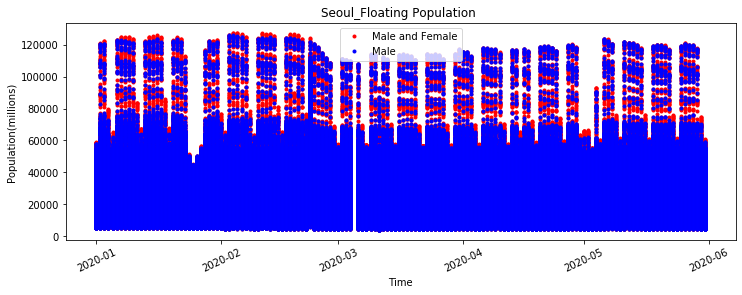

In [13]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=25)
plt.title('Seoul_Floating Population ')
plt.xlabel('Time')
plt.ylabel('Population(millions)')
plt.plot(df['date'],df['fp_num'],'r.')
plt.plot(df_male['date'],df_male['fp_num'],'b.')
plt.legend(['Male and Female','Male'])
plt.show()

# 4) Tweet extracted with query COVID-19 
#      Analysis Token and pattern

In [14]:
import collections
import nltk
from nltk.corpus import stopwords
import sys
print(sys.executable)
import re

/opt/anaconda3/bin/python


In [15]:
!/opt/anaconda3/bin/python -m pip install wordcloud

In [16]:
from wordcloud import WordCloud

# 4.1 Clearning +Processing Functions for assignment tasks 

In [17]:
# def helper fuctions to process extracted tweet file D2.txt 
# mainly focused on remove url + punctuation + stopwords+ other languages
# split into lits of words 
def remove_url_punctuation(x):
    #get rid of url, punctuations, hashtags
  
    url_pattern= re.compile(r'https?://\S+|www\.\S+')
    replace_url =url_pattern.sub(r'',str(x))
    punctuation = re.compile(r'[^\w\s]')
    without_punctuation = punctuation.sub(r'',replace_url).lower()
    return without_punctuation
    
def split(x):
    #generate pieces of tokens from the entire text
    
    split_word_list = x.split(" ")
    return split_word_list

def remove_stopwords(x):
    #remove stop words
    global stop_words
    
    without_stopwords = []
    for word in x:
        if word not in stop_words and len(word)>2 and word != 'nan':
            without_stopwords.append(word)
    return without_stopwords

def detect_lang(x):
    #extract english tweet only
    
    from langdetect import detect
    try:
        lang = detect(x)
        return(lang)
    except:
        return("other")
    

# 4.2 Load tweets file

In [19]:
# you may need to rename the extrexcted D2.txt file by your default setting
# since it may not include extension .txt when its ouputed by tweet_extracter.py
df2 = pd.read_csv('D2.txt', sep='\t', names=['id','text'])

In [20]:
df2

,id,text
0,1293840952784715776,STAT updates just to cheer us all up...notLong...
1,1293840962708484096,"Los contagios siguen al alza en Alemania, que ..."
2,1293840962679078918,SIPTU’s Greg Ennis tells the Committee on Covi...
3,1293840969666707456,German only: Seminar #COVID19 Wie krisenfest i...
4,1293840969658273794,"No longer just an option, #delivery has all bu..."
5,1293840969691996163,#MtaaniConversationsParenting is an important ...
6,1293840972720332800,"Are you really that stupid, Mike? Or do you th..."
7,1293840976839049216,"#GranCaracas | Érika Farías, alcaldesa del mun..."
8,1293840976889298946,▸ ASESORÍA LEGAL FRENTE AL COVID-19 ◂Le ofrece...
9,1293840983222706182,#AmmaCovidHomecareScheme to be unveiled by Hon...


# 4.3 Apply clearning functions to get tidy tweet 

In [21]:
df2['tidy_tweet'] = df2['text'].apply(remove_url_punctuation)

print(df2['text'].head())
print("**********************")
print(df2['tidy_tweet'].head())

0    STAT updates just to cheer us all up...notLong...
1    Los contagios siguen al alza en Alemania, que ...
2    SIPTU’s Greg Ennis tells the Committee on Covi...
3    German only: Seminar #COVID19 Wie krisenfest i...
4    No longer just an option, #delivery has all bu...
Name: text, dtype: object
**********************
0    stat updates just to cheer us all upnotlong af...
1    los contagios siguen al alza en alemania que r...
2    siptus greg ennis tells the committee on covid...
3    german only seminar covid19 wie krisenfest ist...
4    no longer just an option delivery has all but ...
Name: tidy_tweet, dtype: object



# 4.4 fliter  english only tweet


In [22]:
!/opt/anaconda3/bin/python -m pip install langdetect
df2['en']=df2['text'].apply(detect_lang)
print(df2['tidy_tweet'].head(10))
print("**********************")
df2 = df2[df2['en']=='en']
print(df2['tidy_tweet'].head(10))

0    stat updates just to cheer us all upnotlong af...
1    los contagios siguen al alza en alemania que r...
2    siptus greg ennis tells the committee on covid...
3    german only seminar covid19 wie krisenfest ist...
4    no longer just an option delivery has all but ...
5    mtaaniconversationsparenting is an important i...
6    are you really that stupid mike or do you thin...
7    grancaracas  érika farías alcaldesa del munici...
8     asesoría legal frente al covid19 le ofrecemos...
9    ammacovidhomecarescheme to be unveiled by hono...
Name: tidy_tweet, dtype: object
**********************
0     stat updates just to cheer us all upnotlong af...
2     siptus greg ennis tells the committee on covid...
4     no longer just an option delivery has all but ...
5     mtaaniconversationsparenting is an important i...
6     are you really that stupid mike or do you thin...
9     ammacovidhomecarescheme to be unveiled by hono...
10     had his plans for working abroad dashed  supp...
11 

# 4.5 Tokenize words 

In [23]:
df2['word_list'] = df2['tidy_tweet'].apply(split)
print(df2['word_list'].head(10))

0     [stat, updates, just, to, cheer, us, all, upno...
2     [siptus, greg, ennis, tells, the, committee, o...
4     [no, longer, just, an, option, delivery, has, ...
5     [mtaaniconversationsparenting, is, an, importa...
6     [are, you, really, that, stupid, mike, or, do,...
9     [ammacovidhomecarescheme, to, be, unveiled, by...
10    [, had, his, plans, for, working, abroad, dash...
11    [delhi, corona, update, for, every, covid19, p...
12    [the, concept, of, antifragility, from, nntale...
13    [if, youre, a, small, business, thinking, abou...
Name: word_list, dtype: object


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# 4.6 Remove Stop Words

In [24]:
nltk.download('stopwords')
global stop_words
stop_words =set(stopwords.words('english'))
df2['nlp_tweet'] =df2['word_list'].apply(remove_stopwords)
print(df2['word_list'].head(10))
print("**********************")
print(df2['nlp_tweet'].head(10))

0     [stat, updates, just, to, cheer, us, all, upno...
2     [siptus, greg, ennis, tells, the, committee, o...
4     [no, longer, just, an, option, delivery, has, ...
5     [mtaaniconversationsparenting, is, an, importa...
6     [are, you, really, that, stupid, mike, or, do,...
9     [ammacovidhomecarescheme, to, be, unveiled, by...
10    [, had, his, plans, for, working, abroad, dash...
11    [delhi, corona, update, for, every, covid19, p...
12    [the, concept, of, antifragility, from, nntale...
13    [if, youre, a, small, business, thinking, abou...
Name: word_list, dtype: object
**********************
0     [stat, updates, cheer, upnotlong, fire, covid1...
2     [siptus, greg, ennis, tells, committee, covid1...
4     [longer, option, delivery, become, necessity, ...
5     [mtaaniconversationsparenting, important, issu...
6     [really, stupid, mike, think, supporters, stup...
9     [ammacovidhomecarescheme, unveiled, honourable...
10    [plans, working, abroad, dashed, supported, 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mozzie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# 4.7 Analysis Tokens (frequency )

In [25]:
#list of unique tokens 
all_words_unique_list2 = (df2['nlp_tweet'].explode()).unique()
#num of unique tokens in D1
print (len(all_words_unique_list2)) 
word_list2 =list(df2['nlp_tweet'].explode())
# use NLTK to create a dic of words with frenquency
nltk_count2 = nltk.FreqDist(word_list2)
print(nltk_count2.most_common(100))

5717
[('covid19', 657), ('people', 78), ('new', 78), ('amp', 76), ('pandemic', 75), ('health', 56), ('cases', 52), ('get', 52), ('vaccine', 50), ('virus', 45), ('coronavirus', 42), ('deaths', 36), ('news', 33), ('day', 33), ('government', 31), ('world', 29), ('may', 29), ('dont', 28), ('year', 28), ('2020', 28), ('one', 27), ('trump', 27), ('help', 26), ('public', 26), ('way', 26), ('business', 25), ('million', 25), ('still', 24), ('via', 24), ('would', 23), ('due', 22), ('work', 22), ('positive', 22), ('could', 21), ('see', 21), ('country', 21), ('today', 21), ('need', 20), ('impact', 20), ('please', 20), ('first', 20), ('time', 20), ('test', 19), ('safe', 19), ('school', 19), ('workers', 19), ('next', 19), ('response', 18), ('take', 18), ('care', 18), ('testing', 18), ('also', 18), ('confirmed', 18), ('back', 18), ('well', 18), ('results', 17), ('sopcantsavejee_neet', 17), ('lockdown', 17), ('august', 17), ('live', 17), ('total', 17), ('look', 17), ('working', 16), ('corona', 16), ('

# 4.8 View as WordCloud

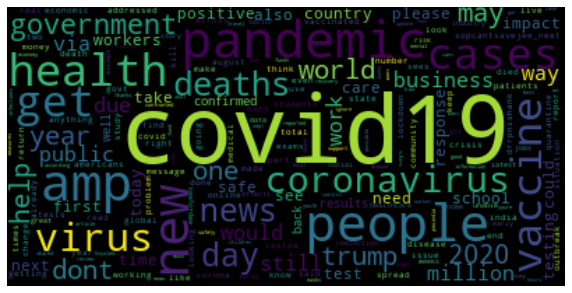

In [27]:
wordcloud = WordCloud().generate_from_frequencies(nltk_count2)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation  ='bilinear')
plt.axis('off')
plt.show()

# 5 Glance at SearchTrends of South Korean

In [28]:
st_df = pd.read_csv('SearchTrend.csv')

In [29]:
st_df

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381
5,2016-01-06,0.17272,0.14399,0.25081,0.01381
6,2016-01-07,0.17390,0.12408,0.25135,0.01190
7,2016-01-08,0.16735,0.12499,0.29044,0.01572
8,2016-01-09,0.13463,0.10190,0.24390,0.01036
9,2016-01-10,0.15135,0.33062,0.21108,0.00699


In [32]:
def range_of_date(df, date_col):
    data_col = pd.to_datetime(df[date_col]).dt.date
    date_range = (max(data_col) - min(data_col)).days + 1
    print(f'# {min(data_col)} to {max(data_col)}')

range_of_date(st_df,'date')

# 2016-01-01 to 2020-06-29


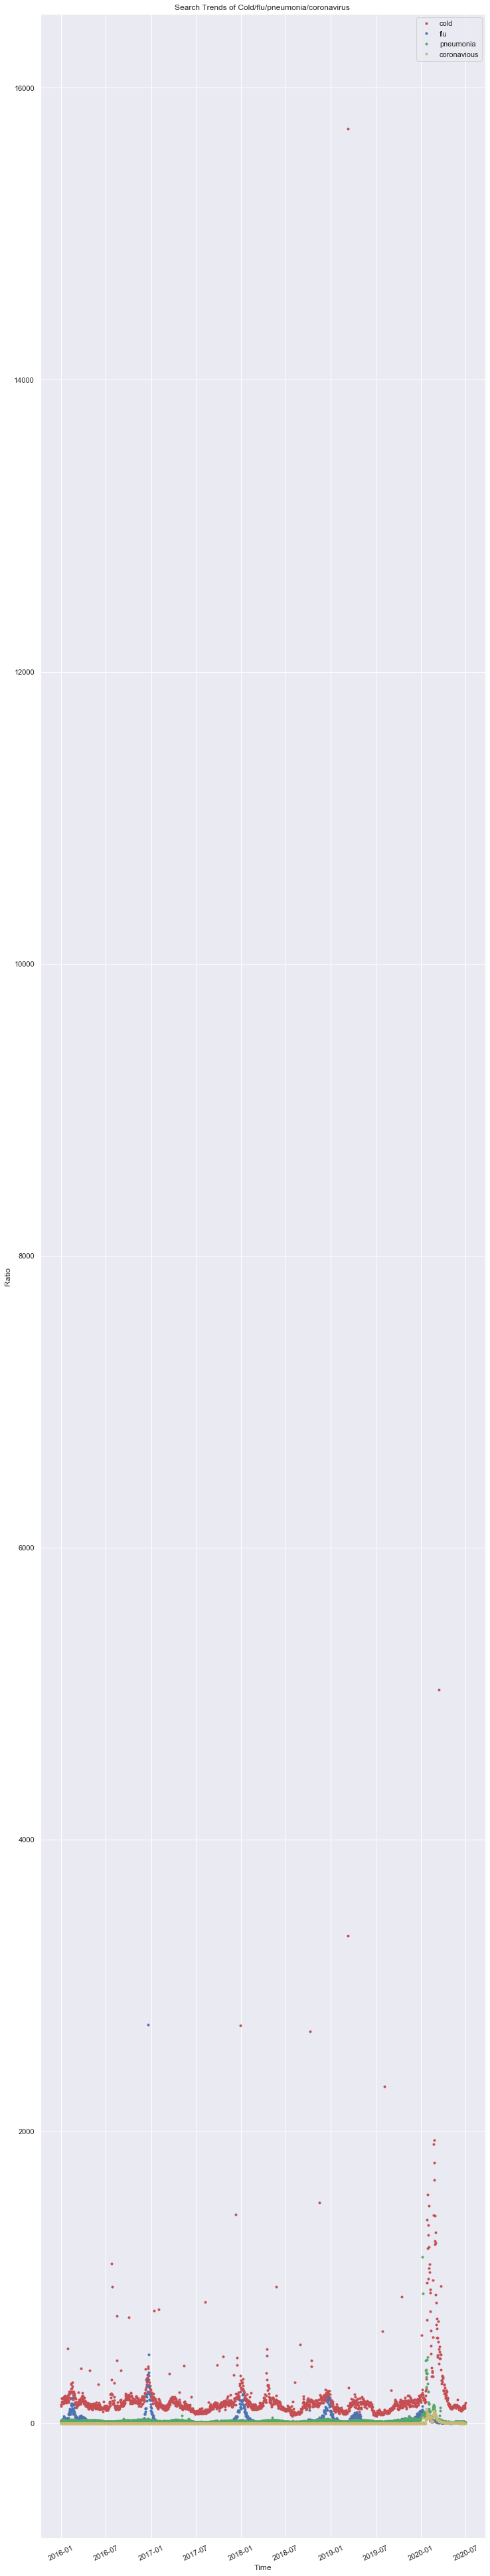

In [52]:
import seaborn
seaborn.set()
st_df['date']=pd.to_datetime(st_df['date'],format = '%Y-%m-%d')

plt.figure(figsize=(12, 70))
plt.xticks(rotation=25)
plt.title('Search Trends of Cold/flu/pneumonia/coronavirus ')
plt.xlabel('Time')
plt.ylabel('Ratio')

plt.plot(st_df['date'],st_df['cold'],'r.')
plt.plot(st_df['date'],st_df['flu'],'b.')
plt.plot(st_df['date'],st_df['pneumonia'],'g.')
plt.plot(st_df['date'],st_df['coronavirus'],'y.')


plt.legend(['cold','flu','pneumonia','coronavious'])
plt.show()

In [49]:
#As expected, there were only the spikes of seasonal flu and cold before COVID-19 outbreak

#Increase of searching pneumonia was prior to that of coronavirus(COVID-19)
    #- because it's called Wuhan pneumonia at first in S.Korea
      #  - Wuhan is the assumed place where COVID-19 pandemic started

In [50]:
# After 1st case in korean

In [51]:
after_first_case_df = st_df[st_df.date >= '2020-01-20']

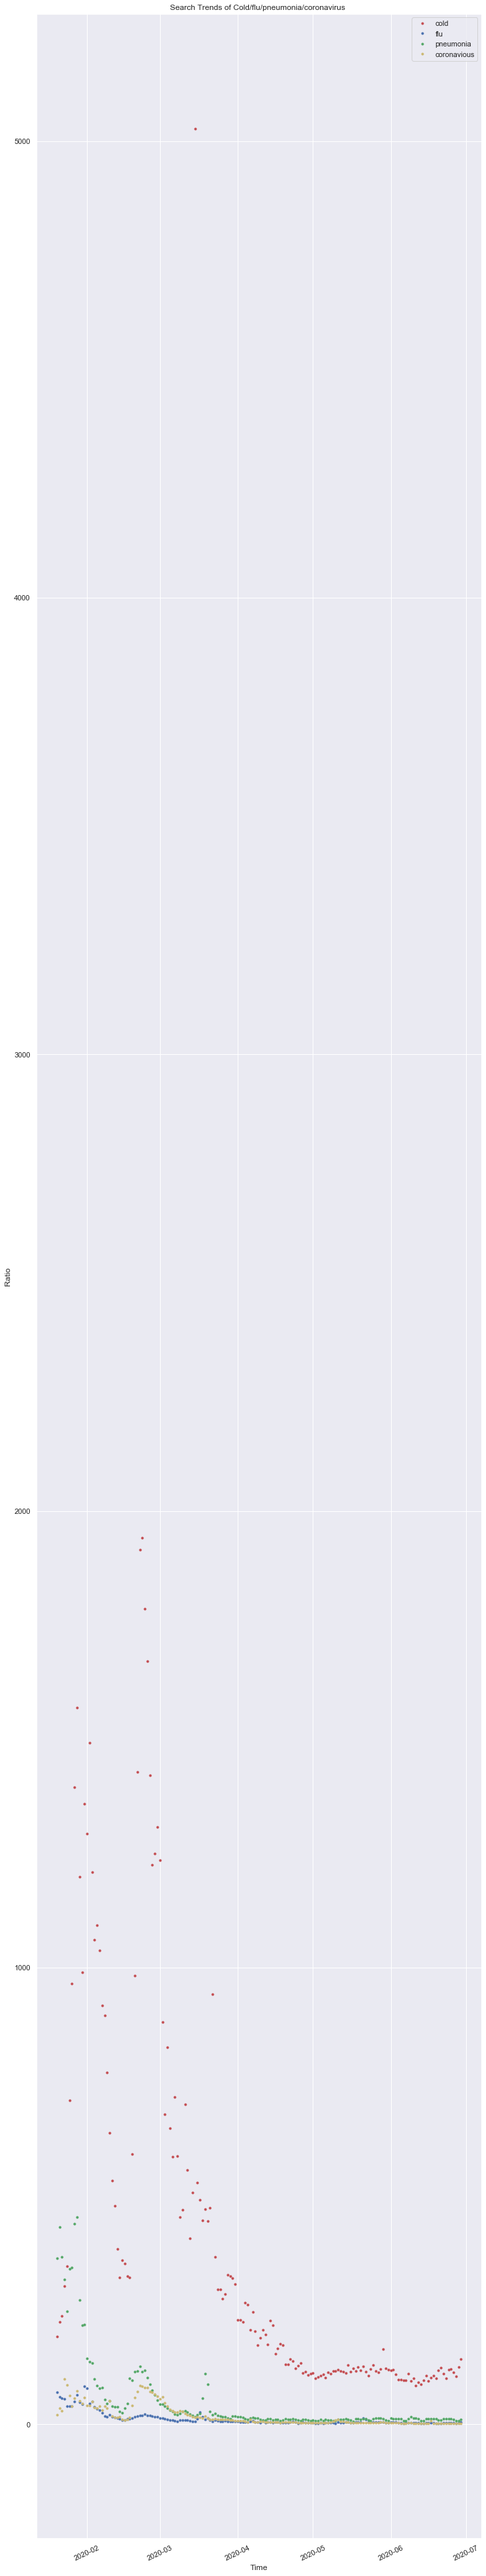

In [53]:


plt.figure(figsize=(12, 70))
plt.xticks(rotation=25)
plt.title('Search Trends of Cold/flu/pneumonia/coronavirus ')
plt.xlabel('Time')
plt.ylabel('Ratio')

plt.plot(after_first_case_df['date'],after_first_case_df['cold'],'r.')
plt.plot(after_first_case_df['date'],after_first_case_df['flu'],'b.')
plt.plot(after_first_case_df['date'],after_first_case_df['pneumonia'],'g.')
plt.plot(after_first_case_df['date'],after_first_case_df['coronavirus'],'y.')


plt.legend(['cold','flu','pneumonia','coronavious'])
plt.show()

In [54]:
dd= pd.read_csv('train.csv')
dd.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0
